In [ ]:
from hol.level_series import LevelSeries

import matplotlib.pyplot as plt
%matplotlib inline

# Synchronic level topns.
topns = LevelSeries(range(1, 20), depth=1000)

### Synchronic edit distance from level 1

The edit distance between the MDWs for each successive level (for all years) and the level 1 list:

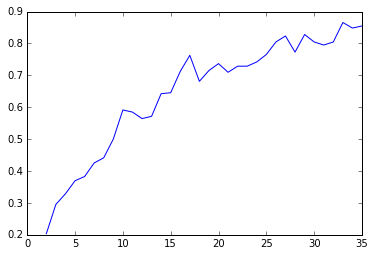

In [39]:
from distance import jaccard

%matplotlib inline
import matplotlib.pyplot as plt

topn1 = list(level_mdw[1].keys())[:300]

ratios = {}
for level in levels[1:35]:
    topni = list(level_mdw[level].keys())[:300]
    ratios[level] = jaccard(topn1, topni)

plt.plot(*zip(*ratios.items()))

- everything packerup near the top, within 10 of the max.
- spikes up quickly, levels off slightly at ~5, then increases more slowly up to the max.

- around 5, from 4-6, the rate of change is slower, the successive lists more similar.
- 5 is an inflection point? the place around which the community is most stable?
- as the level goes up towards 30, the overall volume shoots way down - is the rate of change just a sampling issue?